# 三、 疫情因素影响

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Shibor's Fluctuation 

In [8]:
# 从⽂文件中读取原始数据
file_spread = "../数据集/Shibor查询表/Shibor数据2020.xls"        
df=pd.read_excel(file_spread)

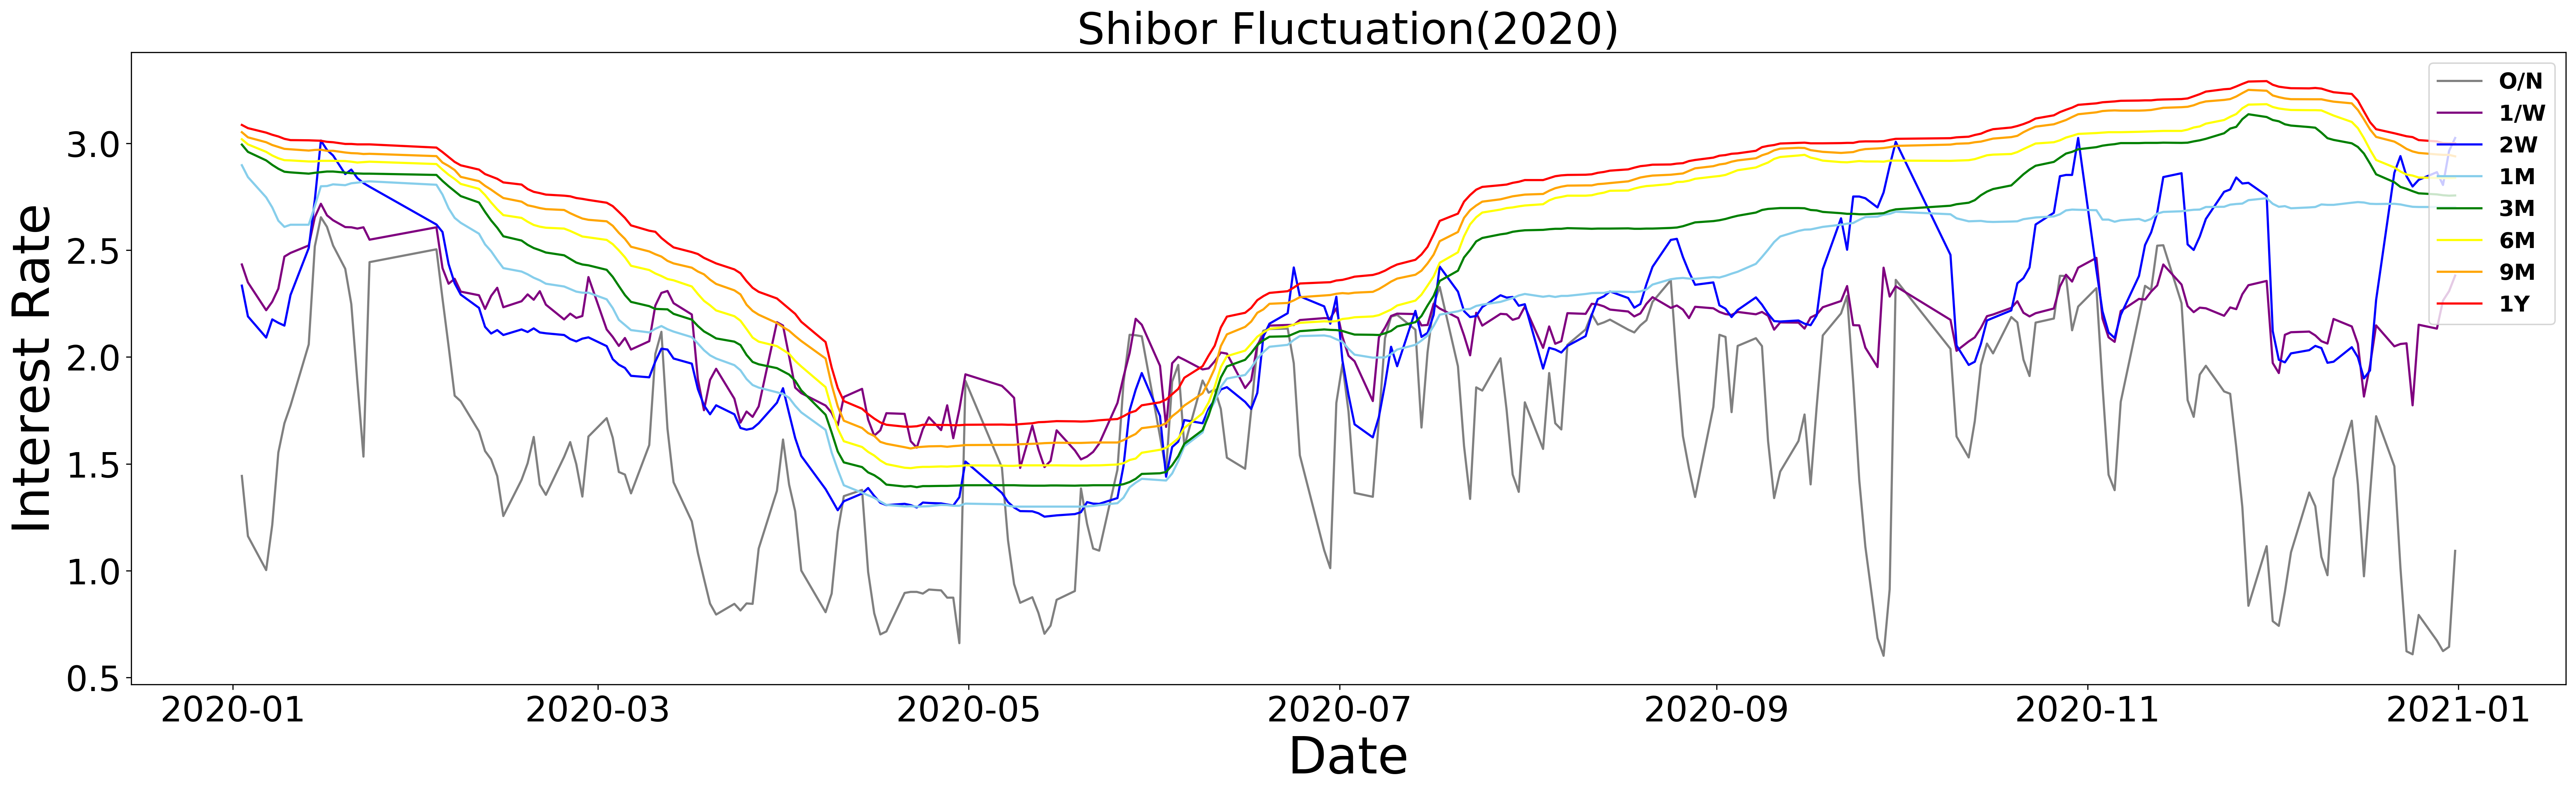

In [9]:
plt.figure(dpi=300,figsize=(30,8))
plt.title('Shibor Fluctuation(2020)',fontsize=30)
plt.plot(list(df['日期']), list(df['O/N']), color='grey', label='O/N')
plt.plot(list(df['日期']), list(df['1W']), color='purple', label='1/W')
plt.plot(list(df['日期']), list(df['2W']), color='blue', label='2W')
plt.plot(list(df['日期']), list(df['1M']), color='skyblue', label='1M')
plt.plot(list(df['日期']), list(df['3M']), color='green', label='3M')
plt.plot(list(df['日期']), list(df['6M']), color='yellow', label='6M')
plt.plot(list(df['日期']), list(df['9M']), color='orange', label='9M')
plt.plot(list(df['日期']), list(df['1Y']), color='red', label='1Y')

plt.legend(loc='upper right', prop={"size":15,"weight":"black"}) # 显示图例
plt.tick_params(labelsize=24)  # 放大坐标轴刻度
plt.xlabel('Date', fontsize=35)
plt.ylabel('Interest Rate',fontsize=35)
plt.savefig("../数据集/results/ShiborList.jpg")

## 2. Comparison between Shibor and Pandemic Fluctuation in Feb. 2020 

In [10]:
# Read Data
file = '../数据集/新冠疫情数据.xlsx'          
df2=pd.read_excel(file)

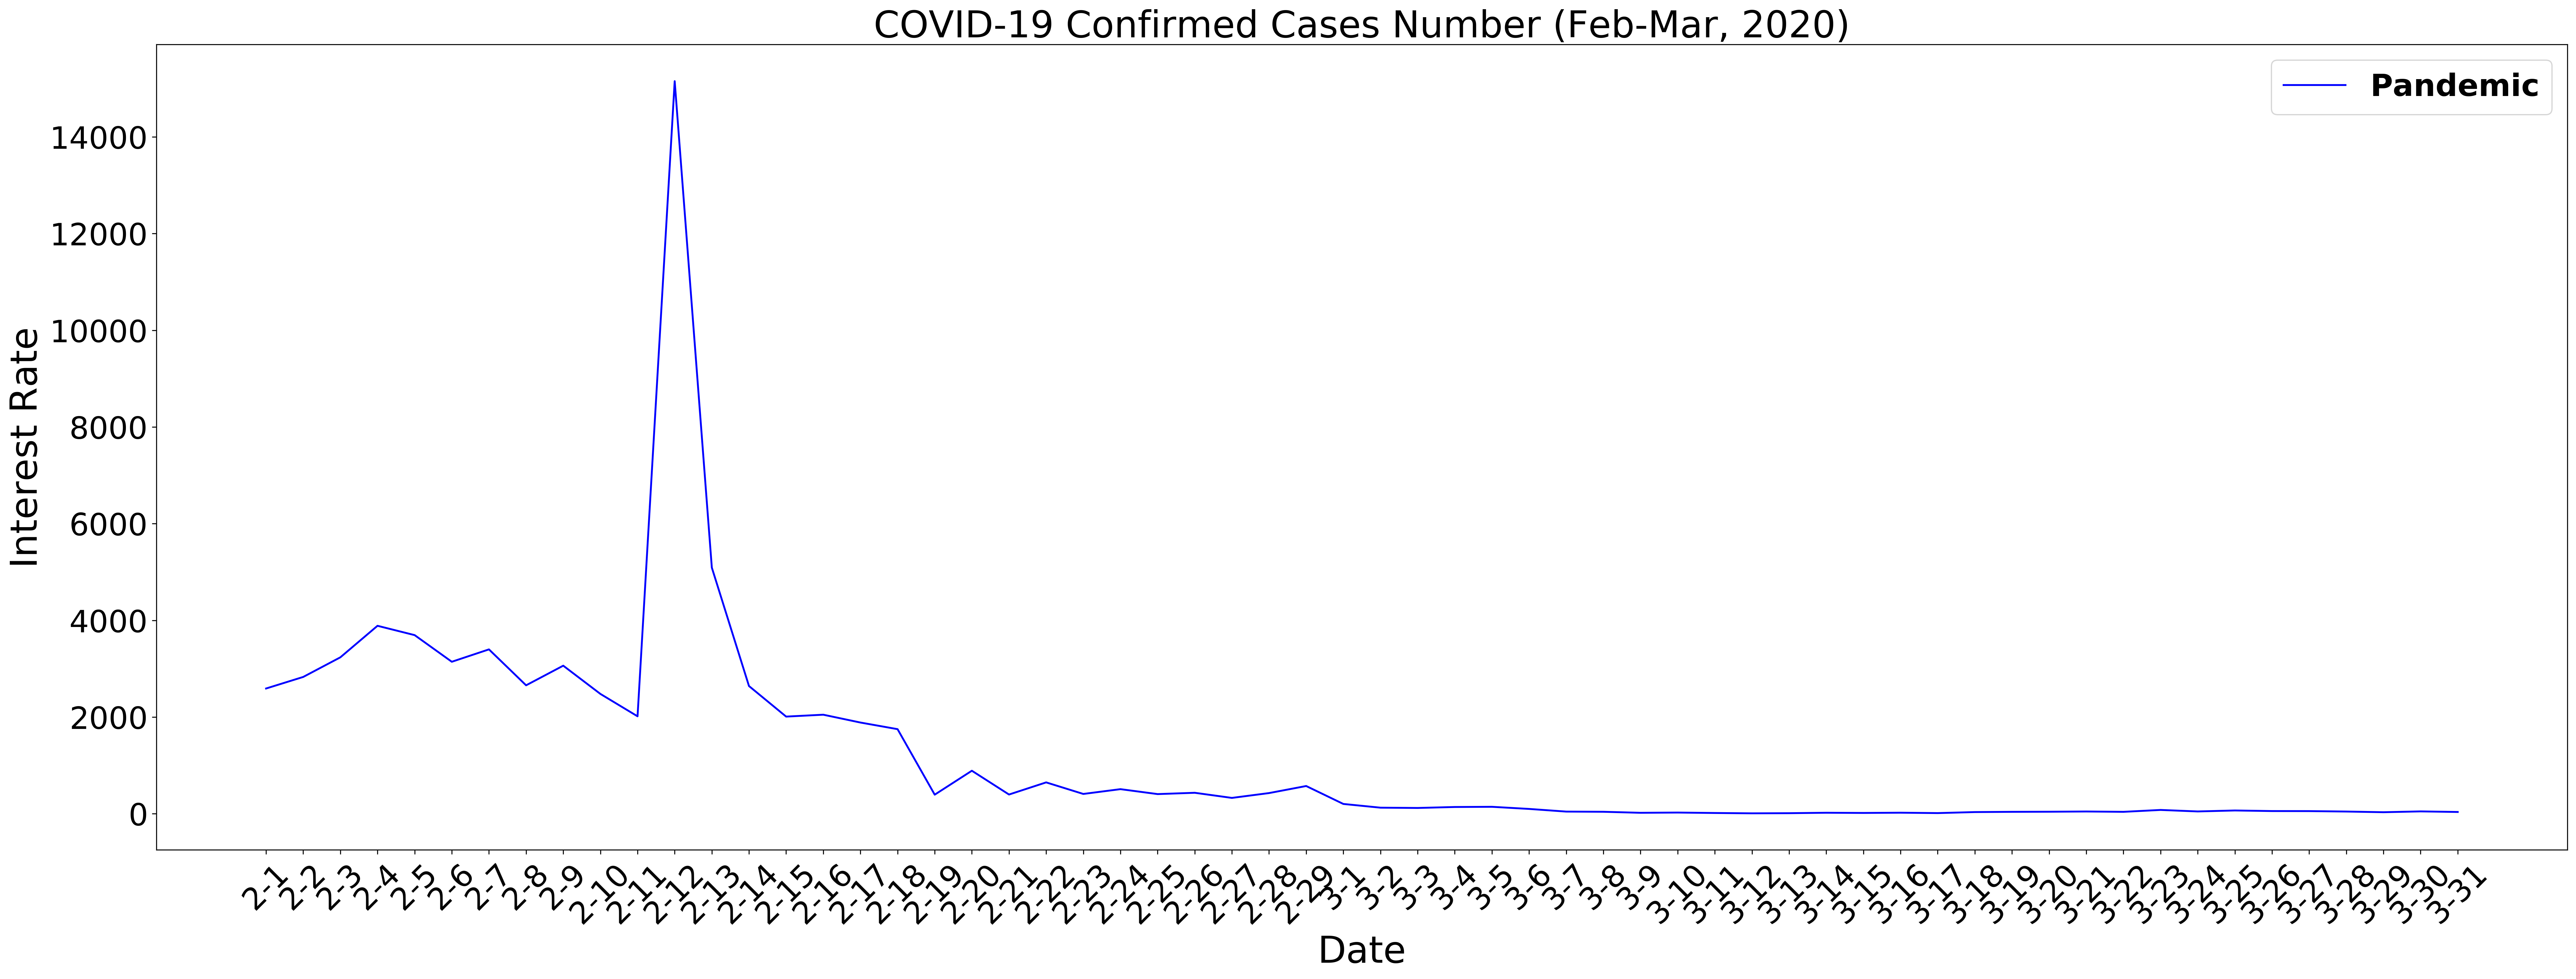

In [11]:
# 1. Pandemic's
import matplotlib.ticker as ticker

plt.figure(dpi=300,figsize=(35,12))
plt.title('COVID-19 Confirmed Cases Number (Feb-Mar, 2020)',fontsize=30)
x_axis = ["2-1","2-2","2-3","2-4","2-5","2-6","2-7","2-8","2-9","2-10","2-11","2-12","2-13","2-14","2-15","2-16","2-17","2-18","2-19","2-20","2-21","2-22","2-23","2-24","2-25","2-26","2-27","2-28","2-29",
          "3-1","3-2","3-3","3-4","3-5","3-6","3-7","3-8","3-9","3-10",
          "3-11","3-12","3-13","3-14","3-15","3-16","3-17","3-18","3-19","3-20","3-21","3-22","3-23","3-24","3-25","3-26","3-27","3-28","3-29","3-30","3-31"]

plt.plot(x_axis, list(df2['pandemic']), color='blue', label='Pandemic')

plt.legend(loc='upper right', prop={"size":25,"weight":"black"}) # 显示图例
plt.tick_params(labelsize=25)  # 放大坐标轴刻度
plt.xlabel('Date', fontsize=30)
plt.ylabel('Interest Rate', fontsize=30)
plt.xticks(rotation=45)
#plt.show()
plt.savefig("../数据集/results/Pandemic.jpg")


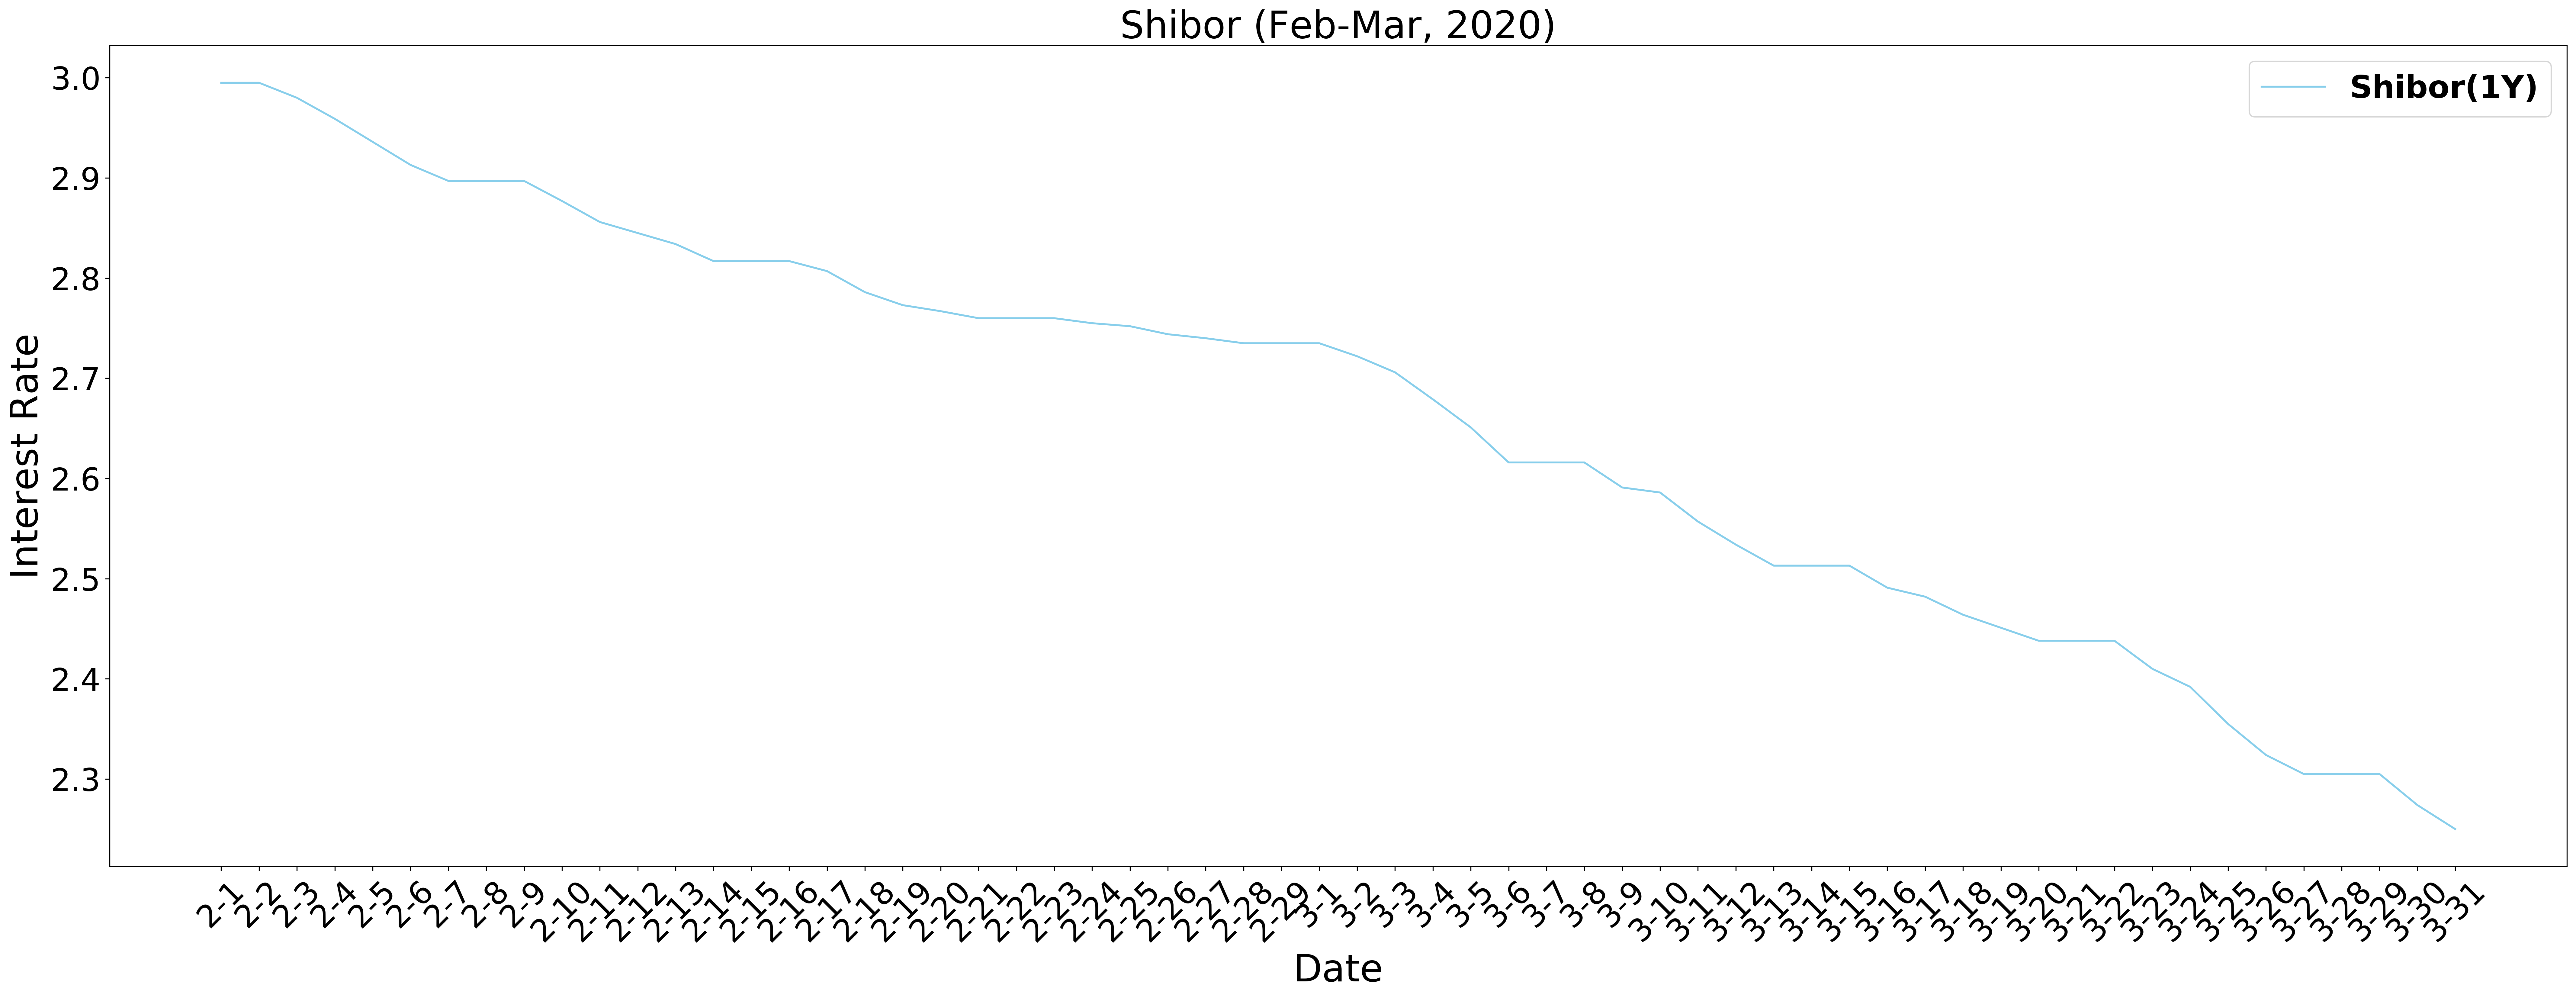

In [12]:
# 2. Shibor's
plt.figure(dpi=300,figsize=(35,12))
plt.title('Shibor (Feb-Mar, 2020)',fontsize=30)
x_axis = ["2-1","2-2","2-3","2-4","2-5","2-6","2-7","2-8","2-9","2-10","2-11","2-12","2-13","2-14","2-15","2-16","2-17","2-18","2-19","2-20","2-21","2-22","2-23","2-24","2-25","2-26","2-27","2-28","2-29",
          "3-1","3-2","3-3","3-4","3-5","3-6","3-7","3-8","3-9","3-10",
          "3-11","3-12","3-13","3-14","3-15","3-16","3-17","3-18","3-19","3-20","3-21","3-22","3-23","3-24","3-25","3-26","3-27","3-28","3-29","3-30","3-31"]

plt.plot(x_axis, list(df2['Shibor']), color='skyblue', label='Shibor(1Y)')

plt.legend(loc='upper right', prop={"size":25,"weight":"black"}) # 显示图例
plt.tick_params(labelsize=25)  # 放大坐标轴刻度
plt.xlabel('Date', fontsize=30)
plt.ylabel('Interest Rate', fontsize=30)
plt.xticks(rotation=45)
#plt.show()
plt.savefig("../数据集/results/Shibor.jpg")

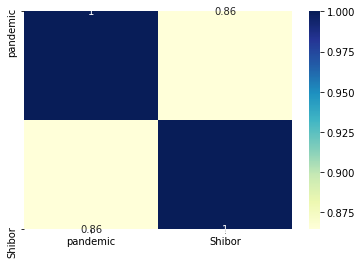

In [13]:
# 3. 将两个指标相关性分析
data_corr = df2[['pandemic','Shibor']]
data_corr = pd.DataFrame(data_corr, dtype=np.float)
sp_corr = data_corr.corr(method='spearman')
sp_corr


sns.heatmap(sp_corr, cmap="YlGnBu", annot=True)

# 将相关性检测结果输出到结果集
sp_corr.to_excel("../数据集/results/correlation(Shibor-Pandemic).xlsx",index=0)